### Indexing Playground

Import the datasets and algorithms:

In [51]:
%run datasets.ipynb
%run trees_lib.ipynb

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Select a dataset:

In [47]:
dataset = datasets_thurgau_7()
#dataset = datasets_cities_200k()
#dataset = datasets_world_12M()


Start playing with the data, build a kd-tree over the coordinates, for example:

In [48]:
kdtree = build_kd_tree(key_id_tuples(dataset, ['latitude', 'longitude']), len(dataset))

  0%|          | 0/5 [00:00<?, ?it/s]

Draw a nice visualization if its not too large:

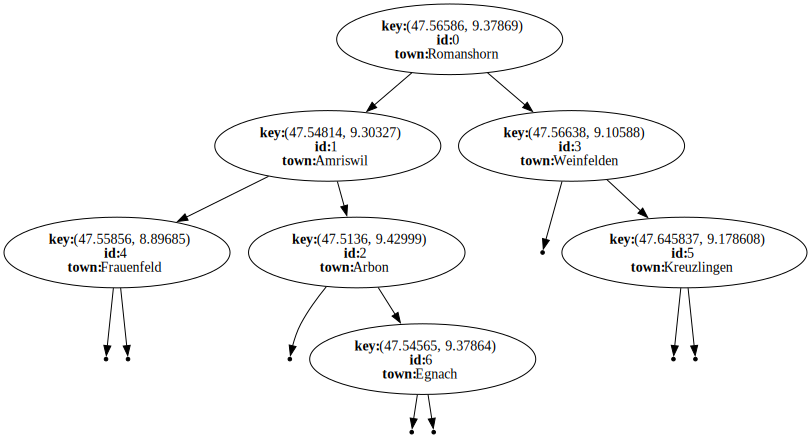

In [49]:
height = tree_height(kdtree)
graph = None
if height < 7:
    graph = tree_graph(kdtree, dataset)
graph

And measure how long it takes to extract a few values from the tree:

In [65]:
%%time
# All towns in Oberthurgau
lower_left = (47.5, 9.3)
upper_right = (47.6, 9.4)
print("Towns in Oberthurgau:")
for node in search_kd_tree(kdtree, [(lower_left[0], upper_right[0]), (lower_left[1], upper_right[1])]):
    print(node.key, node.value, dataset[node.value]['name'])



Towns in Oberthurgau:
(47.54814, 9.30327) 1 Amriswil
(47.54565, 9.37864) 6 Egnach
(47.56586, 9.37869) 0 Romanshorn
CPU times: user 67 µs, sys: 29 µs, total: 96 µs
Wall time: 88.7 µs


Search for the nearest node near a point:

In [66]:
query = (47.5, 9.35)
%time nn, distance = nearest_neighbor(kdtree, query)
print(dataset[nn.value]['name'], math.sqrt(distance))


CPU times: user 31 µs, sys: 1e+03 ns, total: 32 µs
Wall time: 31.9 µs
Egnach 0.053890371125092866
